<a href="https://colab.research.google.com/github/ilikecookies112345/DSRP-Project-Mentor-Assignment---Astronomy/blob/main/DSRP_Project_%26_Mentor_Assignment_Astronomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ucimlrepo

import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# fetch dataset
solar_flare = fetch_ucirepo(id=89)

# data (as pandas dataframes)
X = solar_flare.data.features
y = solar_flare.data.targets

# metadata
print(solar_flare.metadata)

# variable information
print(solar_flare.variables)

solar_flare_df = pd.concat([X, y], axis=1)
print(solar_flare_df.shape)


{'uci_id': 89, 'name': 'Solar Flare', 'repository_url': 'https://archive.ics.uci.edu/dataset/89/solar+flare', 'data_url': 'https://archive.ics.uci.edu/static/public/89/data.csv', 'abstract': 'Each class attribute counts the number of solar flares of a certain class that occur in a 24 hour period', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1389, 'num_features': 10, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['common flares', 'moderate flares', 'severe flares'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5530G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Notes:\r\n\r\n   -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.\r\n   -- Each instance represents captur

In [4]:
solar_flare_df.shape
solar_flare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   modified Zurich class            1389 non-null   object
 1   largest spot size                1389 non-null   object
 2   spot distribution                1389 non-null   object
 3   activity                         1389 non-null   int64 
 4   evolution                        1389 non-null   int64 
 5   previous 24 hour flare activity  1389 non-null   int64 
 6   historically-complex             1389 non-null   int64 
 7   became complex on this pass      1389 non-null   int64 
 8   area                             1389 non-null   int64 
 9   area of largest spot             1389 non-null   int64 
 10  common flares                    1389 non-null   int64 
 11  moderate flares                  1389 non-null   int64 
 12  severe flares                    1

In [5]:
solar_flare_df.describe()

,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.150468,2.421166,1.089993,1.395968,1.892009,1.025918,1.175666,0.261339,0.067675,0.009359
std,0.357658,0.617129,0.403292,0.489234,0.310481,0.158948,0.380673,0.760201,0.353695,0.103534
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,2.000000


In [6]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   modified Zurich class            1389 non-null   object
 1   largest spot size                1389 non-null   object
 2   spot distribution                1389 non-null   object
 3   activity                         1389 non-null   int64 
 4   evolution                        1389 non-null   int64 
 5   previous 24 hour flare activity  1389 non-null   int64 
 6   historically-complex             1389 non-null   int64 
 7   became complex on this pass      1389 non-null   int64 
 8   area                             1389 non-null   int64 
 9   area of largest spot             1389 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 108.6+ KB
None


In [7]:
solar_flare_df.head(10)

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0
5,D,A,O,1,2,1,1,2,1,2,0,0,0
6,D,A,O,1,2,1,1,2,1,1,0,0,0
7,D,A,O,1,2,1,1,2,1,2,0,0,0
8,D,K,O,1,3,1,1,2,1,2,0,0,0
9,C,R,O,1,3,1,1,2,1,1,0,0,0


In [8]:
print(solar_flare_df.isna().sum())

solar_flare_df.columns

modified Zurich class              0
largest spot size                  0
spot distribution                  0
activity                           0
evolution                          0
previous 24 hour flare activity    0
historically-complex               0
became complex on this pass        0
area                               0
area of largest spot               0
common flares                      0
moderate flares                    0
severe flares                      0
dtype: int64


Index(['modified Zurich class', 'largest spot size', 'spot distribution',
       'activity', 'evolution', 'previous 24 hour flare activity',
       'historically-complex', 'became complex on this pass', 'area',
       'area of largest spot', 'common flares', 'moderate flares',
       'severe flares'],
      dtype='object')

In [9]:
solar_flare_df.rename(columns = {'historically-complex' : 'Historically Complex' ,'modified Zurich class' : 'Modified Zurich Class', 'largest spot size' : 'Largest Spot Size' , 'spot distribution' :'Spot Distribution',
       'activity' : 'Activity', 'evolution' : 'Evolution', 'previous 24 hour flare activity' : 'Previous 24 Hour Flare Activity',  'became complex on this pass' : 'Became Complex on this Pass', 'area' : 'Area',
       'area of largest spot' : 'Area of Largest Spot', 'common flares' : ' Common Flares ', 'moderate flares' : 'Moderate Flares',
       'severe flares' : 'Severe Flares'}, inplace = True)

solar_flare_df.head()

,Modified Zurich Class,Largest Spot Size,Spot Distribution,Activity,Evolution,Previous 24 Hour Flare Activity,Historically Complex,Became Complex on this Pass,Area,Area of Largest Spot,Common Flares,Moderate Flares,Severe Flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


In [10]:
solar_flare_df.columns = solar_flare_df.columns.str.strip()
flare_types = ['Common Flares', 'Moderate Flares', 'Severe Flares']
print(solar_flare_df[flare_types].describe())
print(solar_flare_df['Modified Zurich Class'].unique())


       Common Flares  Moderate Flares  Severe Flares
count    1389.000000      1389.000000    1389.000000
mean        0.261339         0.067675       0.009359
std         0.760201         0.353695       0.103534
min         0.000000         0.000000       0.000000
25%         0.000000         0.000000       0.000000
50%         0.000000         0.000000       0.000000
75%         0.000000         0.000000       0.000000
max         8.000000         5.000000       2.000000
['C' 'D' 'B' 'F' 'H' 'E']


In [11]:
solar_flare_df.dtypes

,0
Modified Zurich Class,object
Largest Spot Size,object
Spot Distribution,object
Activity,int64
Evolution,int64
Previous 24 Hour Flare Activity,int64
Historically Complex,int64
Became Complex on this Pass,int64
Area,int64
Area of Largest Spot,int64


In [12]:
#solar_flare_df = solar_flare_df.drop_duplicates()
solar_flare_df.duplicated().sum()

np.int64(862)

['Modified Zurich Class', 'Largest Spot Size', 'Spot Distribution', 'Activity', 'Evolution', 'Previous 24 Hour Flare Activity', 'Historically Complex', 'Became Complex on this Pass', 'Area', 'Area of Largest Spot', 'Common Flares', 'Moderate Flares', 'Severe Flares']


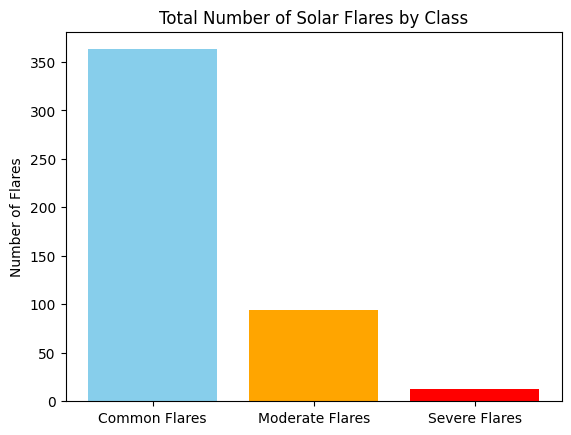

In [13]:
solar_flare_df.columns = solar_flare_df.columns.str.strip()

print(solar_flare_df.columns.tolist())

categories = ['Common Flares', 'Moderate Flares', 'Severe Flares']

flare_counts = solar_flare_df[categories].sum()

plt.bar(categories, flare_counts.values, color=['skyblue', 'orange', 'red'])
plt.ylabel('Number of Flares')
plt.title('Total Number of Solar Flares by Class')
plt.show()



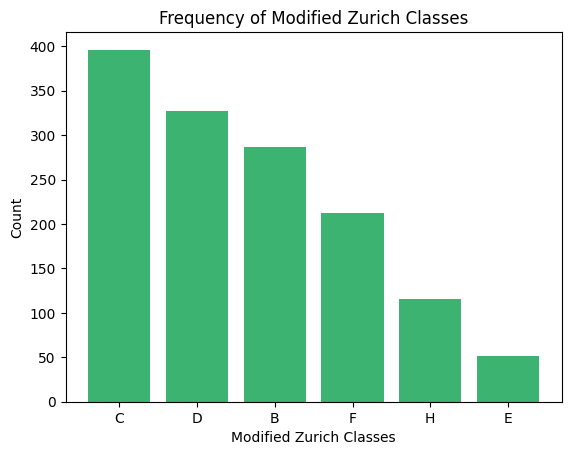

In [14]:
categories = solar_flare_df['Modified Zurich Class'].unique()

zurich_counts = solar_flare_df['Modified Zurich Class'].value_counts()

plt.bar(categories, zurich_counts.values, color='mediumseagreen')
plt.ylabel('Count')
plt.xlabel ('Modified Zurich Classes')
plt.title('Frequency of Modified Zurich Classes')
plt.show()


1. How does sunspot complexity (Zurich Class) affect the number of solar flares in a 24-hour period?

2. What factors best predict the number of severe solar flares?

3. How do spot size and distribution influence the severity of solar flare activity?

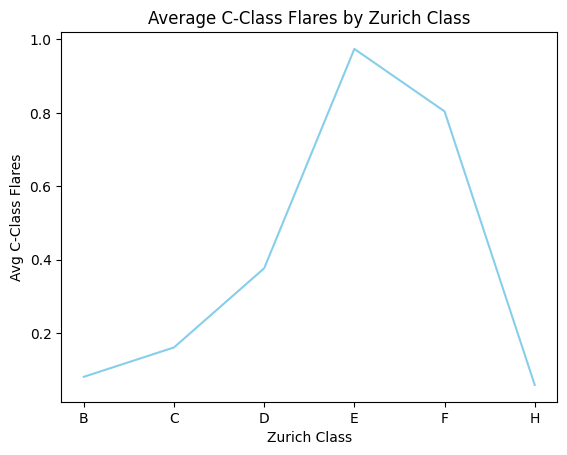

In [15]:
solar_flare_df.columns = solar_flare_df.columns.str.strip()

zurich_avg_c = solar_flare_df.groupby('Modified Zurich Class')['Common Flares'].mean()

zurich_avg_c = zurich_avg_c.sort_index()

plt.plot(zurich_avg_c.index, zurich_avg_c.values, color='skyblue')
plt.title('Average C-Class Flares by Zurich Class')
plt.xlabel('Zurich Class')
plt.ylabel('Avg C-Class Flares')
plt.show()

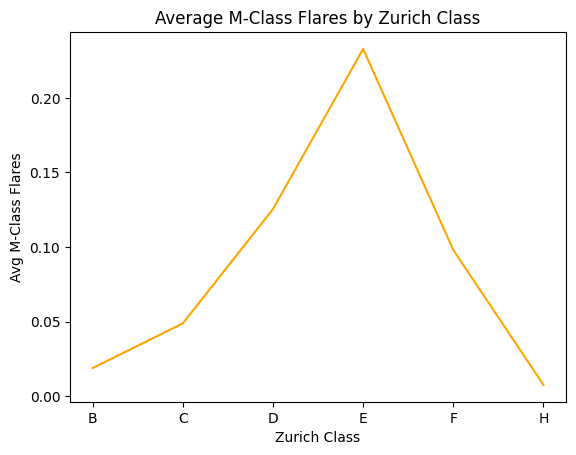

In [16]:
solar_flare_df.columns = solar_flare_df.columns.str.strip()

zurich_avg_M = solar_flare_df.groupby('Modified Zurich Class')['Moderate Flares'].mean()

zurich_avg_M = zurich_avg_M.sort_index()

plt.plot(zurich_avg_M.index, zurich_avg_M.values, color='orange')
plt.title('Average M-Class Flares by Zurich Class')
plt.xlabel('Zurich Class')
plt.ylabel('Avg M-Class Flares')
plt.show()

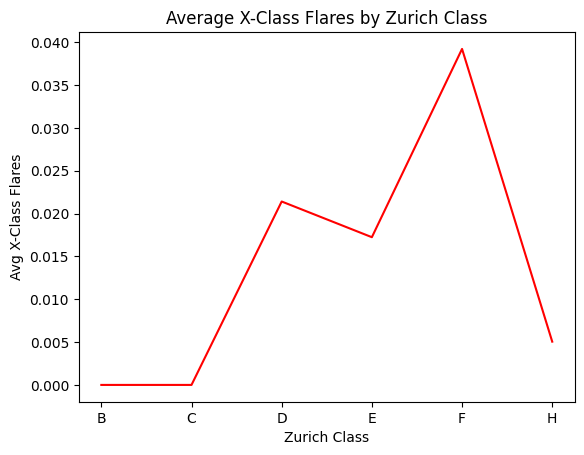

In [17]:
solar_flare_df.columns = solar_flare_df.columns.str.strip()

zurich_avg_X = solar_flare_df.groupby('Modified Zurich Class')['Severe Flares'].mean()

zurich_avg_X = zurich_avg_X.sort_index()

plt.plot(zurich_avg_X.index, zurich_avg_X.values, color='red')
plt.title('Average X-Class Flares by Zurich Class')
plt.xlabel('Zurich Class')
plt.ylabel('Avg X-Class Flares')
plt.show()

In [18]:
zurich_avg_X.values

array([0.        , 0.        , 0.02140673, 0.01724138, 0.03921569,
       0.00505051])

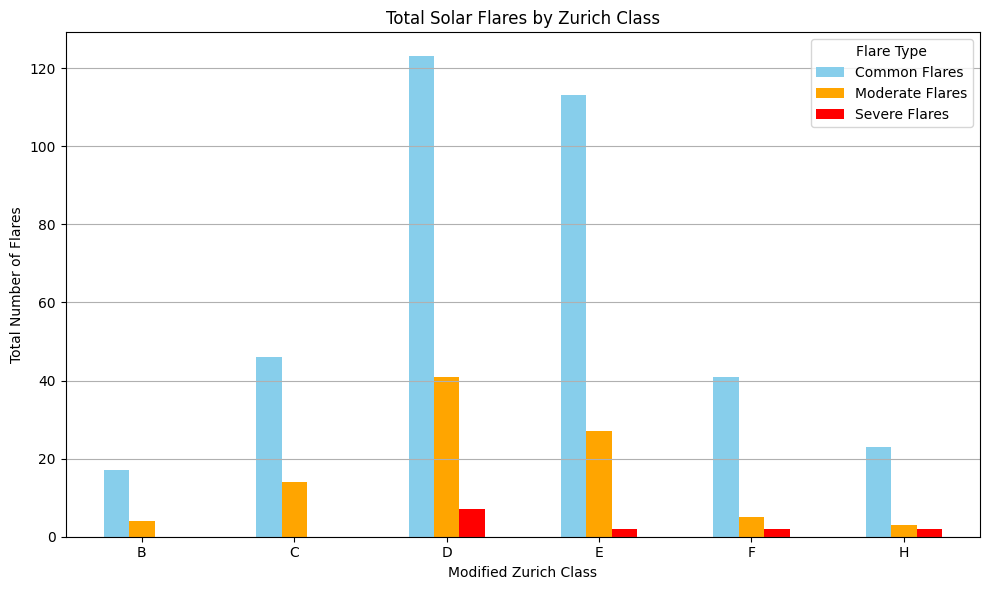

In [19]:
flare_types = ['Common Flares', 'Moderate Flares', 'Severe Flares']

flare_totals = solar_flare_df.groupby('Modified Zurich Class')[flare_types].sum()

flare_totals.plot(kind='bar',  figsize=(10, 6), color=['skyblue', 'orange', 'red'])
plt.xticks(rotation=0)
plt.title('Total Solar Flares by Zurich Class')
plt.xlabel('Modified Zurich Class')
plt.ylabel('Total Number of Flares')
plt.legend(title='Flare Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


It can be observed that the D-class in the Modified Zurich Class has the highest total number of solar flares across moderate and severe. However E-class has the highest total number of solare flares across common.

F-class flares are rare but frequent per event, producing high numbers of flares per observation. D-class itself is more frequent, but less flares per event

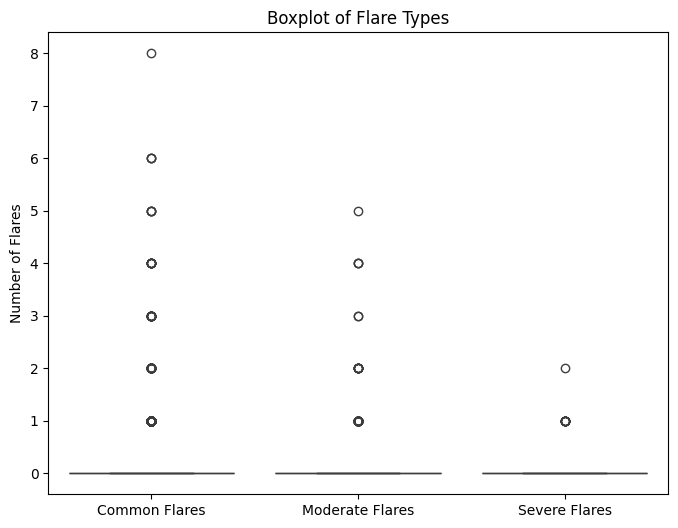

,Common Flares,Moderate Flares,Severe Flares
count,1389.000000,1389.000000,1389.000000
mean,0.261339,0.067675,0.009359
std,0.760201,0.353695,0.103534
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,8.000000,5.000000,2.000000


In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=solar_flare_df[flare_types])
plt.title('Boxplot of Flare Types')
plt.ylabel('Number of Flares')
plt.show()
solar_flare_df[flare_types].describe()

There is ALOT of 0 common flares for most rows, 25% = 0, 50% = 0, 75% = 0. That goes along with moderate flares AND severe flares.

Let's say my hypothesis is "D-class Zurich flares have significantly more Severe (X-class) flares than E-class."



In [21]:
subset_df = solar_flare_df[solar_flare_df['Modified Zurich Class'].isin(['D', 'E'])]

In [22]:
group_D = solar_flare_df[solar_flare_df['Modified Zurich Class'] == 'D']['Severe Flares']
group_E = solar_flare_df[solar_flare_df['Modified Zurich Class'] == 'E']['Severe Flares']

stat, p_value = ttest_ind(group_D, group_E, equal_var=False)
print(f"T-test Statistic: {stat}")
print(f"P-value: {p_value}")


T-test Statistic: 0.2744398725711648
P-value: 0.7839707411750629


How do spot size and distribution influence the severity of solar flare activity?

/tmp/ipython-input-602491430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=solar_flare_df, x='Largest Spot Size', y='Severe Flares', palette='Reds')


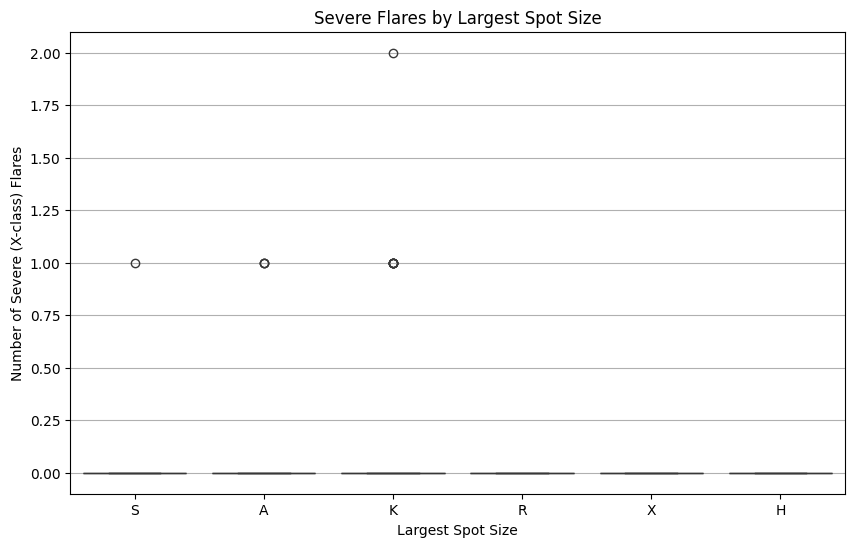

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=solar_flare_df, x='Largest Spot Size', y='Severe Flares', palette='Reds')
plt.title('Severe Flares by Largest Spot Size')
plt.xlabel('Largest Spot Size')
plt.ylabel('Number of Severe (X-class) Flares')
plt.grid(axis='y')
plt.show()

Larger spot sizes like K may be associated with more frequent or intense severe (X-class) solar flares, although the events are rare. All other classes have zero severe solar flares

/tmp/ipython-input-1650758395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=solar_flare_df, x='Spot Distribution', y='Severe Flares', palette='Oranges')


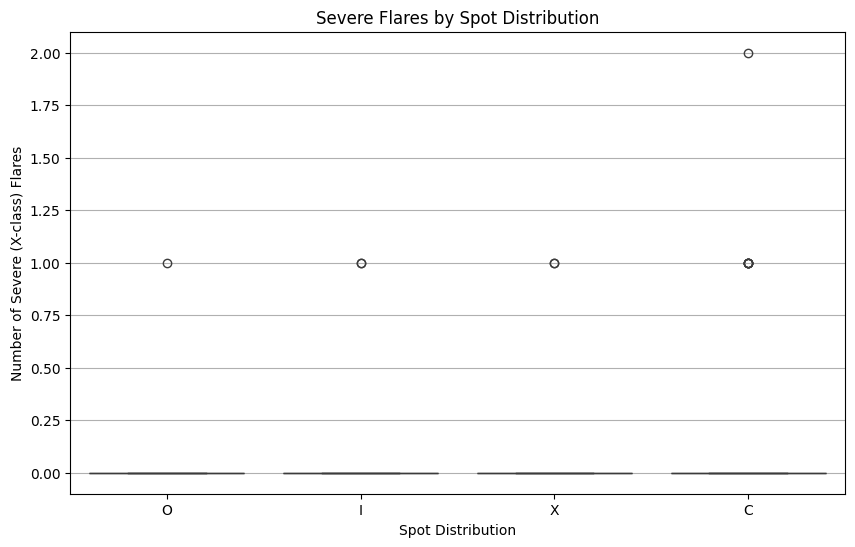

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=solar_flare_df, x='Spot Distribution', y='Severe Flares', palette='Oranges')
plt.title('Severe Flares by Spot Distribution')
plt.xlabel('Spot Distribution')
plt.ylabel('Number of Severe (X-class) Flares')
plt.grid(axis='y')
plt.show()

The spot distribution category C may be linked to higher severe flare activity

In [25]:
import statsmodels.stats.multicomp as mc

comp_spot_size = mc.MultiComparison(solar_flare_df['Severe Flares'], solar_flare_df['Largest Spot Size'])
tukey_result_spot_size = comp_spot_size.tukeyhsd()
print("Tukey HSD results for Largest Spot Size:")
print(tukey_result_spot_size)

Tukey HSD results for Largest Spot Size:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      H  -0.0108 0.9896 -0.0607   0.039  False
     A      K   0.0849    0.0  0.0505  0.1193   True
     A      R  -0.0108 0.8186 -0.0358  0.0142  False
     A      S  -0.0089 0.8463 -0.0304  0.0126  False
     A      X  -0.0108 0.8502 -0.0372  0.0155  False
     H      K   0.0957    0.0  0.0403  0.1511   True
     H      R      0.0    1.0 -0.0501  0.0501  False
     H      S   0.0019    1.0 -0.0465  0.0504  False
     H      X      0.0    1.0 -0.0508  0.0508  False
     K      R  -0.0957    0.0 -0.1305  -0.061   True
     K      S  -0.0938    0.0 -0.1261 -0.0615   True
     K      X  -0.0957    0.0 -0.1315   -0.06   True
     R      S   0.0019 0.9999 -0.0201   0.024  False
     R      X      0.0    1.0 -0.0268  0.0268  False
     S      X  -0.0019 0.9999 -0.0255  0.0217  False
-----

The K group differs significantly from A, R, S , X, and H, p-adj = 0. This means that the average number of severe flares for spot size K is significantly different.

In [26]:
comp_spot_dist = mc.MultiComparison(solar_flare_df['Severe Flares'], solar_flare_df['Spot Distribution'])
tukey_result_spot_dist = comp_spot_dist.tukeyhsd()
print("\nTukey HSD results for Spot Distribution:")
print(tukey_result_spot_dist)


Tukey HSD results for Spot Distribution:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     C      I  -0.1417    0.0 -0.1796 -0.1039   True
     C      O  -0.1466    0.0  -0.183 -0.1102   True
     C      X  -0.1431    0.0 -0.1803 -0.1059   True
     I      O  -0.0048 0.8984 -0.0226   0.013  False
     I      X  -0.0014 0.9979 -0.0208  0.0181  False
     O      X   0.0035 0.9493  -0.013  0.0199  False
----------------------------------------------------


Category C (in Spot Distribution) has a significantly different average number of Severe Flares compared to I, O, and X.

K-sized sunspots  and

C-type distributions

are significantly more likely to produce severe (X-class) solar flares. This conclusion is also backed up by visualizations shown above.


How does Zurich Class affect the number of solar flares in a 24-hour period?

Null : The average number of solar flares is the same across all Zurich Classes.

Alternative : At least one Zurich Class has a different average number of solar flares.

In [27]:
import statsmodels.stats.multicomp as mc

In [28]:
comp = mc.MultiComparison(solar_flare_df['Common Flares'], solar_flare_df['Modified Zurich Class'])
tukey_result = comp.tukeyhsd()
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     B      C   0.0801 0.8144 -0.1035  0.2636  False
     B      D    0.296    0.0  0.1172  0.4747   True
     B      E   0.8939    0.0  0.6599   1.128   True
     B      F   0.7237    0.0  0.4076  1.0398   True
     B      H  -0.0221 0.9991 -0.1946  0.1504  False
     C      D   0.2159 0.0025  0.0519  0.3798   True
     C      E   0.8139    0.0  0.5909  1.0369   True
     C      F   0.6436    0.0  0.3356  0.9516   True
     C      H  -0.1022 0.4299 -0.2593  0.0549  False
     D      E    0.598    0.0   0.379   0.817   True
     D      F   0.4278 0.0009  0.1226  0.7329   True
     D      H  -0.3181    0.0 -0.4695 -0.1666   True
     E      F  -0.1702 0.7109 -0.5107  0.1703  False
     E      H  -0.9161    0.0   -1.13 -0.7021   True
     F      H  -0.7458    0.0 -1.0474 -0.4443   True
----------------------------------------------

Some pairs like B vs C, C vs H, or E vs F do not differ significantly.

The Modified Zurich Class has a significant effect on the average number of Common Flares.
Specifically, classes E, F, and D consistently have significantly higher flare counts than classes B, C, and H. This is backed up from the previous visualizations created.

so yes Zurich Class influences solar flare activity.
Alternative hypothesis rejected



In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
X = solar_flare_df[['Modified Zurich Class', 'Largest Spot Size', 'Spot Distribution']]
y = solar_flare_df['Severe Flares']

X = solar_flare_df[['Modified Zurich Class', 'Largest Spot Size', 'Spot Distribution']]
y = solar_flare_df['Severe Flares']


X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.030059101334687376
Root Mean Squared Error (RMSE): 0.12670747761916634
R² Score: 0.0910051318517816


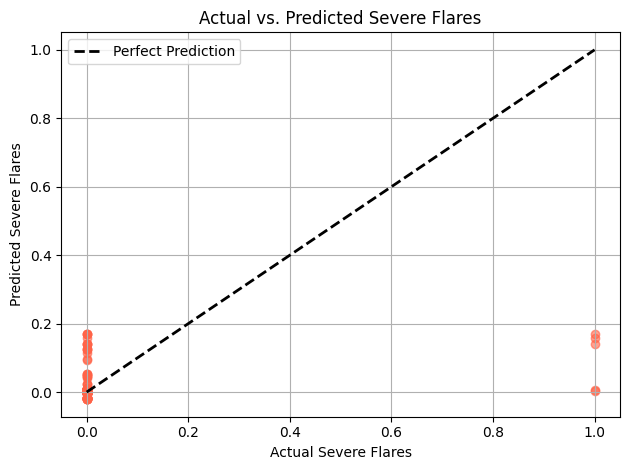

In [30]:
plt.scatter(y_test, y_pred, alpha=0.6, color='tomato')
plt.xlabel("Actual Severe Flares")
plt.ylabel("Predicted Severe Flares")
plt.title("Actual vs. Predicted Severe Flares")
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2, label="Perfect Prediction")  # diagonal line
plt.legend()
plt.tight_layout()
plt.show()

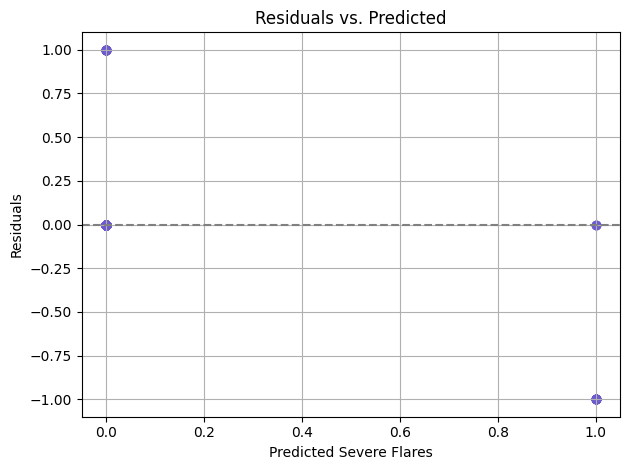

In [31]:
y = solar_flare_df['Common Flares']
X = solar_flare_df.drop(['Common Flares', 'Moderate Flares', 'Severe Flares'], axis=1)


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression on Common Flares")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Linear Regression on Common Flares
MAE: 0.4195
RMSE: 0.7286
R² Score: -0.0366


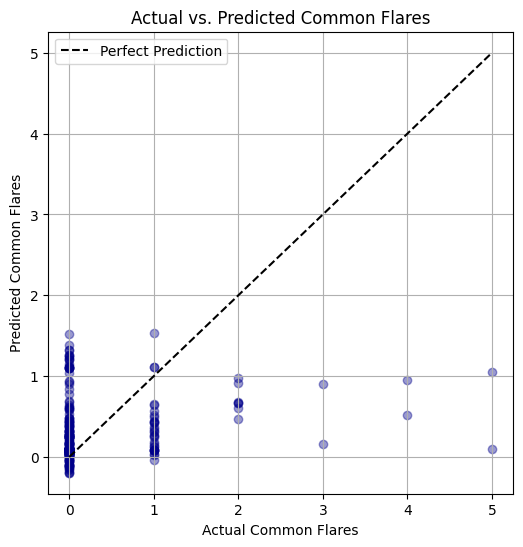

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='darkblue', alpha=0.4)
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Common Flares')
plt.ylabel('Predicted Common Flares')
plt.title('Actual vs. Predicted Common Flares')
plt.legend()
plt.grid()
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

solar_flare_df['Common_Flare_Binary'] = (solar_flare_df['Common Flares'] > 0).astype(int)

X = solar_flare_df.drop(['Common Flares', 'Moderate Flares', 'Severe Flares', 'Common_Flare_Binary'], axis=1)
X = pd.get_dummies(X, drop_first=True)

y = solar_flare_df['Common_Flare_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[211  22]
 [ 40   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       233
           1       0.19      0.11      0.14        45

    accuracy                           0.78       278
   macro avg       0.51      0.51      0.51       278
weighted avg       0.73      0.78      0.75       278



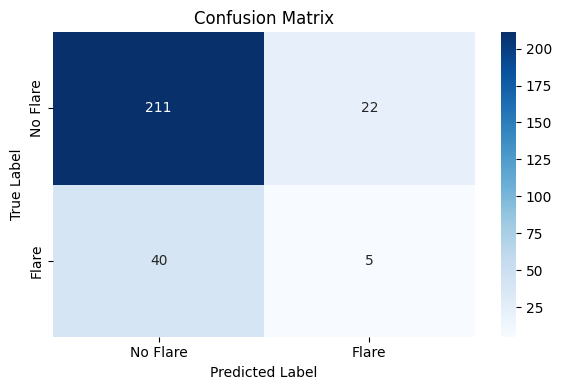

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flare', 'Flare'], yticklabels=['No Flare', 'Flare'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
print(solar_flare_df.columns)

Index(['modified Zurich class', 'largest spot size', 'spot distribution',
       'activity', 'evolution', 'previous 24 hour flare activity',
       'historically-complex', 'became complex on this pass', 'area',
       'area of largest spot', 'common flares', 'moderate flares',
       'severe flares'],
      dtype='object')


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       273
           1       0.00      0.00      0.00         5

    accuracy                           0.97       278
   macro avg       0.49      0.50      0.49       278
weighted avg       0.96      0.97      0.97       278



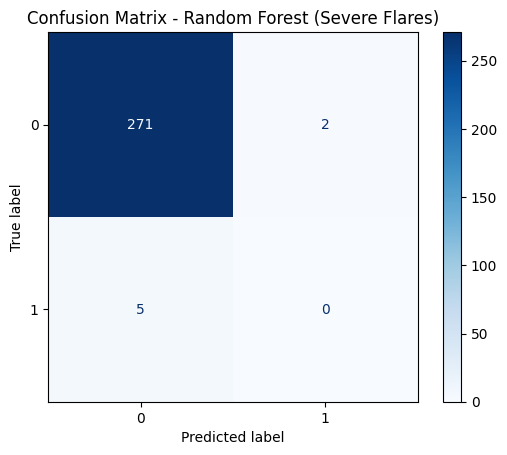

In [35]:
solar_flare_df.columns = solar_flare_df.columns.str.strip()


y = solar_flare_df['Severe Flares']
X = solar_flare_df.drop(['Common Flares', 'Moderate Flares', 'Severe Flares'], axis=1)


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Severe Flares)")
plt.show()
